In [1]:
import pandas as pd 
import polars as pl 
import fastparquet as fp 
import time

In [2]:
#ABRIL, MAIO E JUNHO:
abril=pl.read_csv("202304_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") 
maio=pl.read_csv("202305_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")
junho=pl.read_csv("202306_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

df_polars=pl.concat([abril,maio,junho])

display(df_polars.head())

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202304,202304,"""AC""",643,"""ACRELANDIA""","""***.833.642-**""",16167611395,"""ABIGAIL DAGMAR MACHADO""","""771,00"""
202304,202304,"""AC""",643,"""ACRELANDIA""","""""",16122034321,"""ABRAAO AMORA SALGUEIRO""","""600,00"""
202304,202304,"""AC""",643,"""ACRELANDIA""","""***.355.042-**""",16121660806,"""ABRAAO DA PIEDADE DO NASCIMENT…","""750,00"""
202304,202304,"""AC""",643,"""ACRELANDIA""","""""",23655106404,"""ABRAAO SILVA CUNHA""","""600,00"""
202304,202304,"""AC""",643,"""ACRELANDIA""","""***.050.782-**""",16094443293,"""ABRAO KEMPNER RUMANZKI""","""600,00"""


In [3]:
df_polars = df_polars.with_columns(pl.col("VALOR PARCELA").str.replace(",",".").cast(pl.Float64))

print(df_polars)

shape: (61_148_557, 9)
┌────────────┬────────────┬─────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ MÊS COMPET ┆ MÊS        ┆ UF  ┆ CÓDIGO     ┆ … ┆ CPF        ┆ NIS        ┆ NOME FAVO ┆ VALOR     │
│ ÊNCIA      ┆ REFERÊNCIA ┆ --- ┆ MUNICÍPIO  ┆   ┆ FAVORECIDO ┆ FAVORECIDO ┆ RECIDO    ┆ PARCELA   │
│ ---        ┆ ---        ┆ str ┆ SIAFI      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ i64        ┆ i64        ┆     ┆ ---        ┆   ┆ str        ┆ i64        ┆ str       ┆ f64       │
│            ┆            ┆     ┆ i64        ┆   ┆            ┆            ┆           ┆           │
╞════════════╪════════════╪═════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 202304     ┆ 202304     ┆ AC  ┆ 643        ┆ … ┆ ***.833.64 ┆ 1616761139 ┆ ABIGAIL   ┆ 771.0     │
│            ┆            ┆     ┆            ┆   ┆ 2-**       ┆ 5          ┆ DAGMAR    ┆           │
│            ┆            ┆     ┆            ┆   ┆            ┆     

In [4]:
df_polars.write_parquet('trimestre2.parquet')


In [5]:
df_lazy=pl.scan_parquet('trimestre2.parquet')

resultado=(df_lazy.filter(pl.col("NOME MUNICÍPIO")=="RIO DE JANEIRO").collect())

display(resultado)

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,f64
202304,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""""",null,"""*** BENEFICIÁRIO MENOR DE 16 A…",590.0
202304,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""""",null,"""*** BENEFICIÁRIO MENOR DE 16 A…",400.0
202304,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""""",null,"""*** BENEFICIÁRIO MENOR DE 16 A…",440.0
202304,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""""",null,"""*** BENEFICIÁRIO MENOR DE 16 A…",600.0
202304,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""***.484.027-**""",16126539525,"""AARAO DIAS RIOS""",750.0
…,…,…,…,…,…,…,…,…
202306,202306,"""RJ""",6001,"""RIO DE JANEIRO""","""""",21339734321,"""ZULMIRA VIEIRA DA SILVA""",440.0
202306,202306,"""RJ""",6001,"""RIO DE JANEIRO""","""***.675.377-**""",16632293450,"""ZULNARA XAVIER DA SILVA RODRIG…",600.0
202306,202306,"""RJ""",6001,"""RIO DE JANEIRO""","""***.890.187-**""",12164939451,"""ZULZIMAR DOS SANTOS PIRES""",600.0


In [19]:
df_estados = df_polars.group_by('UF').agg(pl.col('VALOR PARCELA').sum())
df_estados = df_estados.sort("VALOR PARCELA")

display(df_estados)

UF,VALOR PARCELA
str,f64
"""RR""",1.39861012e8
"""AP""",2.44063734e8
"""RO""",2.46381155e8
"""AC""",2.62741007e8
"""TO""",3.09269751e8
…,…
"""MG""",3.0873e9
"""PE""",3.1347e9
"""RJ""",3.3680e9


In [7]:
import matplotlib.pyplot as plt

In [24]:
df_estados_pandas = df_estados.to_pandas()

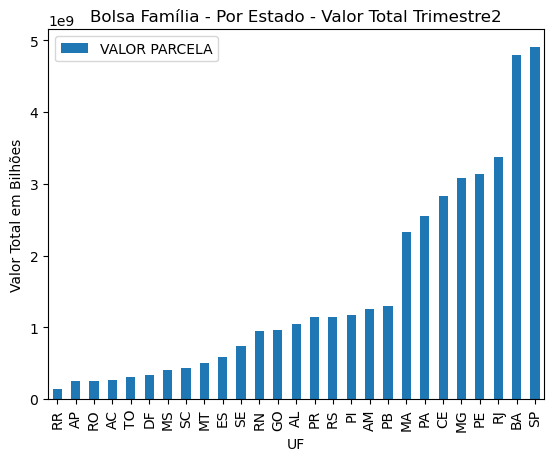

In [25]:
# Plotando o gráfico de barras
df_estados_pandas.plot(x='UF', y='VALOR PARCELA', kind='bar')

plt.title('Bolsa Família - Por Estado - Valor Total Trimestre2')
plt.xlabel('UF')
plt.ylabel('Valor Total em Bilhões')

plt.show()